# Extract bed values that are on the centerlines of Svalbard glaciers

In [49]:
import xarray as xr
import numpy as np
import scipy.interpolate as inter
import pandas as pd
import geopandas as gpd
from datetime import datetime, date, time
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt

## Open the netcdf file of the bed

The ice free topography  of Svalbard is computed by Fürst et al., 2018
https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2018GL079734

We present an ice-free topography of the Svalbard archipelago based on a two-step mass-conserving approach for mapping glacier ice thickness. The Svalbard-wide application is presented in Fürst et al. (2018) and details of the mass-conserving reconstruction approach are speciffied in Fürst et al. (2017). For the thickness reconstruction more than one million individual measurements were considered. The map is provided together with an error-estimate field, which provides first spatial information on the reliability of the reconstruction.

Methods

For details, please refer to Fürst et al. (2018) and Fürst et al. (2017).

Each binary NetCDF file contains four variables, x, y, grid-mapping, and one variable specific to the file.

The x, y, grid-mapping variables define the Universal Transverse Mercator (UTM) projection of the data.

For Svalbard zone 33 was used. Results are presented on a 100-m resolution. For all files, -9999 signifies no data.

The following list provides the file names, the file-specific variable, and descriptions. `

svift_v11_thickness.nc [ meters ] --- thi --- reconstructed ice thickness field

svift_v11_bed.nc [ meters above sea level ] --- bed --- bed elevation of both the ice-free and the ice-covered areas (above EGM96)

svift_v11_error.nc [ meters ] --- err --- Associated error estimates from a formal propagation of input uncertainties

svift_v11_distance.nc [ meters ] --- dist --- Distance of each raster cell to nearest thickness measurement

The data are accessible here: https://data.npolar.no/dataset/57fd0db4-afbf-4c94-ac1c-191c714f1224

In [2]:
ds=xr.open_dataset('/home/colili/Documents/PhD/project_john/data_set/Svift_database/svift_v1_bed.nc')
ts= xr.open_dataset('/home/colili/Documents/PhD/project_john/data_set/Svift_database/svift_v1_thickness.nc')

## Read centerline shapefiles (produced by coordinates_centerlines.ipynb)

In [3]:
df_center = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/Data_centerlines_svalbard/data_centerline_svalbard2.csv')


/home/colili/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
XX, YY = np.meshgrid(ds.x.values, ds.y.values)
Z = ds.bed.values.flatten()
XY = np.vstack((XX.flatten(),YY.flatten())).T

df_center['bed'] = interp.griddata(XY, Z, (df_center.x, df_center.y), method='nearest')

In [6]:
XX, YY = np.meshgrid(ts.x.values, ts.y.values)
Z = ts.thi.values.flatten()
XY = np.vstack((XX.flatten(),YY.flatten())).T

df_center['thickness'] = interp.griddata(XY, Z, (df_center.x, df_center.y), method='nearest')

In [7]:
df_center['surface_elevation'] = df_center.bed + df_center.thickness

In [33]:
df_center

,rgiid,x,y,Surge,BgnDate,EndDate,CenLon,CenLat,Area,Zmin,...,Connect,Form,TermType,Linkages,Name,check_geom,geometry,bed,thickness,surface_elevation
0,RGI60-07.00001,552858.197838,8.514877e+06,0,20080901,-9999999,17.03470,76.7052,0.597,142,...,0,0,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0
1,RGI60-07.00001,552837.209663,8.514876e+06,0,20080901,-9999999,17.03470,76.7052,0.597,142,...,0,0,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0
2,RGI60-07.00001,552816.221488,8.514875e+06,0,20080901,-9999999,17.03470,76.7052,0.597,142,...,0,0,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0
3,RGI60-07.00001,552795.233313,8.514875e+06,0,20080901,-9999999,17.03470,76.7052,0.597,142,...,0,0,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0
4,RGI60-07.00001,552774.245139,8.514874e+06,0,20080901,-9999999,17.03470,76.7052,0.597,142,...,0,0,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134800,RGI60-07.01615,-329067.730001,8.041440e+06,9,19759999,-9999999,-8.34491,71.0142,0.098,351,...,0,0,0,9,NO4W00110527,NaN,NaN,NaN,NaN,NaN
134801,RGI60-07.01615,-329075.466520,8.041459e+06,9,19759999,-9999999,-8.34491,71.0142,0.098,351,...,0,0,0,9,NO4W00110527,NaN,NaN,NaN,NaN,NaN
134802,RGI60-07.01615,-329083.203033,8.041477e+06,9,19759999,-9999999,-8.34491,71.0142,0.098,351,...,0,0,0,9,NO4W00110527,NaN,NaN,NaN,NaN,NaN
134803,RGI60-07.01615,-329090.939541,8.041495e+06,9,19759999,-9999999,-8.34491,71.0142,0.098,351,...,0,0,0,9,NO4W00110527,NaN,NaN,NaN,NaN,NaN


# Width of the glacier for each glacier in Svalbard (RGI zone 07)

Shapefiles of glacier centerlines, flowlines and widths.

These variables are a standard output of OGGM, and can be useful to many. You will find the files here: https://cluster.klima.uni-bremen.de/~oggm/assets/oggm_v1.4/centerlines_shapes.

The following files are available:

RGIxx_centerlines: the geometrical centerlines
RGIxx_flowlines: the centerlines converted to “flowlines”, i.e. interpolated to a regular grid and where upslope trajectories are cropped
RGIxx_geom_widths: the geometrical intersection of the flowlines’ normals with the glacier outlines
RGIxx_widths: the geometrical widths corrected to reflect the glacier’s elevation-area distribution
If you use these data, please cite Maussion et al., 2019.

https://docs.oggm.org/en/latest/assets.html#shapefiles-of-glacier-centerlines-flowlines-and-widths

In [27]:
shapefile = gpd.read_file('/home/colili/Documents/PhD/project_john/data_set/RGI-width_centerlines/RGI07_widths')
shapefile.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Reproject in Mercator

In [28]:
shapefile = shapefile.to_crs("EPSG:32633")
shapefile.head()

,RGIID,SEGMENT_ID,LE_SEGMENT,MAIN,WIDTH_m,geometry
0,RGI60-07.00001,0,546.0,0,125.328827,"LINESTRING (551876.000 8515260.787, 551961.508..."
1,RGI60-07.00001,1,1470.0,1,255.865766,"LINESTRING (552222.383 8514926.841, 552399.938..."
2,RGI60-07.00001,1,1470.0,1,269.541524,"LINESTRING (552183.968 8514895.961, 552381.042..."
3,RGI60-07.00001,1,1470.0,1,340.350701,"LINESTRING (552129.427 8514889.409, 552378.272..."
4,RGI60-07.00001,1,1470.0,1,458.136045,"LINESTRING (552057.713 8514898.882, 552392.675..."


## Find the middle point for each width

In [29]:
def getXY(pt):
    
    '''Function that return x and y 
    from a point geometry object'''
    
    return (pt.x, pt.y)

In [30]:
mid_points = shapefile['geometry'].centroid
x,y = [list(t) for t in zip(*map(getXY, mid_points))]

In [31]:
df_mid = pd.DataFrame({'x':x, 'y': y})
df_mid.head()

,x,y
0,551918.753819,8.515307e+06
1,552311.160530,8.514835e+06
2,552282.505037,8.514804e+06
3,552253.849544,8.514773e+06
4,552225.194051,8.514743e+06


In [32]:
df_width = pd.concat([shapefile, df_mid], axis=1)
df_width

,RGIID,SEGMENT_ID,LE_SEGMENT,MAIN,WIDTH_m,geometry,x,y
0,RGI60-07.00001,0,546.0,0,125.328827,"LINESTRING (551876.000 8515260.787, 551961.508...",551918.753819,8.515307e+06
1,RGI60-07.00001,1,1470.0,1,255.865766,"LINESTRING (552222.383 8514926.841, 552399.938...",552311.160530,8.514835e+06
2,RGI60-07.00001,1,1470.0,1,269.541524,"LINESTRING (552183.968 8514895.961, 552381.042...",552282.505037,8.514804e+06
3,RGI60-07.00001,1,1470.0,1,340.350701,"LINESTRING (552129.427 8514889.409, 552378.272...",552253.849544,8.514773e+06
4,RGI60-07.00001,1,1470.0,1,458.136045,"LINESTRING (552057.713 8514898.882, 552392.675...",552225.194051,8.514743e+06
...,...,...,...,...,...,...,...,...
104017,RGI60-07.01615,0,755.0,1,75.664309,"LINESTRING (-328496.946 8041608.895, -328486.5...",-328491.745607,8.041571e+06
104018,RGI60-07.01615,0,755.0,1,72.435745,"LINESTRING (-328468.782 8041611.126, -328458.8...",-328463.803929,8.041575e+06
104019,RGI60-07.01615,0,755.0,1,188.231139,"LINESTRING (-329107.586 8041331.602, -328937.1...",-329022.374422,8.041290e+06
104020,RGI60-07.01615,0,755.0,1,98.869187,"LINESTRING (-328806.174 8041580.882, -328791.5...",-328798.857643,8.041532e+06


## Interpolate width on the centerline

In [34]:
x = df_width.x.values.flatten()
y = df_width.y.values.flatten()
z = df_width.WIDTH_m.values.flatten()

In [35]:
XY = np.vstack((x,y)).T
XY.shape

(104022, 2)

In [37]:
x_center = df_center.x.values.flatten()
y_center = df_center.y.values.flatten()
x_center

array([ 552858.19783848,  552837.20966276,  552816.2214876 , ...,
       -329083.20303324, -329090.93954087, -329098.67604287])

In [39]:
df_center['width_centerline']=interp.griddata(XY, z, (x_center, y_center), method='linear')

In [40]:
df_center.head()

,rgiid,x,y,Surge,BgnDate,EndDate,CenLon,CenLat,Area,Zmin,...,Form,TermType,Linkages,Name,check_geom,geometry,bed,thickness,surface_elevation,width_centerline
0,RGI60-07.00001,552858.197838,8.514877e+06,0,20080901,-9999999,17.0347,76.7052,0.597,142,...,0,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0,86.307950
1,RGI60-07.00001,552837.209663,8.514876e+06,0,20080901,-9999999,17.0347,76.7052,0.597,142,...,0,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0,52.001931
2,RGI60-07.00001,552816.221488,8.514875e+06,0,20080901,-9999999,17.0347,76.7052,0.597,142,...,0,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0,63.412109
3,RGI60-07.00001,552795.233313,8.514875e+06,0,20080901,-9999999,17.0347,76.7052,0.597,142,...,0,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0,74.822291
4,RGI60-07.00001,552774.245139,8.514874e+06,0,20080901,-9999999,17.0347,76.7052,0.597,142,...,0,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0,112.223246


# Extract runoff and CMB from file

The data are based on this paper: https://tc.copernicus.org/articles/13/2259/2019/#section6

The digital elevation model can be accessed at https://doi.org/10.21334/npolar.2014.dce53a47 (Norwegian Polar Institute, 2014). The glacier and land masks were constructed from glacier outlines, which are available at https://doi.org/10.21334/npolar.2013.89f430f8 (König et al., 2013). The model outputs behind the presented figures of air temperature, precipitation, CMB, ELA, runoff, refreezing, T14, P14, snow onset, and disappearance dates are available in the following repository: https://doi.org/10.6084/m9.figshare.7836530.v1 (van Pelt et al., 2019). The full model dataset, of which only a selection is presented here, contains data with a 3-hourly temporal resolution and for an extended set of variables; a description of readily available data is accessible online (model output, http://www.wardvanpelt.com/model_output.txt, last access: 13 March 2019). Glacier-wide mass balances for KNG, HBR, HDF, MLB, and ABB are available in the database of the World Glacier Monitoring Service (WGMS; https://wgms.ch/, last access: 6 November 2018). Meteorological time series for Ny-Ålesund and Longyearbyen are accessible through the eKlima portal (Norwegian Meteorological Institute; http://eklima.met.no/, last access: 13 March 2019). The Kongsvegen AWS time series are also accessible at https://doi.org/10.21334/npolar.2017.5dc31930 (Kohler et al., 2017). Unrestricted access to the HIRLAM regional climate model data, point stake mass balance data, and the remaining AWS time series is provided upon request by contacting the institutes that collected/generated the data (see Sect. 2).


Runoff data availability: van Pelt, W. J. J., Pohjola, V. A., Pettersson, R., Marchenko, S., Kohler, J., Luks, B., Hagen, J. O., Schuler, T. V., Dunse, T., Noël, B., and Reijmer, C. H.: A long-term dataset of climatic mass balance, snow conditions and runoff in Svalbard (1957–2018), https://doi.org/10.6084/m9.figshare.7836530.v1, 2019. a (Raw data: https://figshare.com/articles/dataset/A_long-term_dataset_of_climatic_mass_balance_snow_conditions_and_runoff_in_Svalbard_1957-2018_/7836530/1)

## Convert .mat into pd dataframe

In [62]:
mat_file = loadmat('/home/colili/Documents/PhD/project_john/data_set/data_thomas_ELA_beta/Runoff.mat')
mat_file_cmb = loadmat('/home/colili/Documents/PhD/project_john/data_set/data_thomas_ELA_beta/WVP_CMB_ELA_beta.mat')

runoff = mat_file['Runoff'][0][0][0][:, :, -1]
# annual_runoff = mat_file['Annual runoff (1 September - 31 August)']
X = mat_file['Runoff'][0][0][3][:, :]
Y = mat_file['Runoff'][0][0][4][:, :]
Z = mat_file_cmb['Z']
year = mat_file['Runoff'][0][0][5][:, 0]

ELA = mat_file_cmb['ELA']
beta = mat_file_cmb['beta']
cmb = mat_file_cmb['cmb']

In [45]:
df_runoff = pd.DataFrame(runoff, index=Y[:, 0], columns=X[0]).unstack().reset_index()

df_runoff.columns = ['X' , 'Y', 'Runoff']
df_runoff = df_runoff.dropna()
df_runoff

,X,Y,Runoff
11847,403490,8747290,0.665358
11848,403490,8748290,0.729583
11849,403490,8749290,0.778592
11850,403490,8750290,0.913370
11851,403490,8751290,0.787866
...,...,...,...
254611,844490,8961290,0.511356
254612,844490,8962290,0.520604
255156,845490,8956290,0.466077
255157,845490,8957290,0.444423


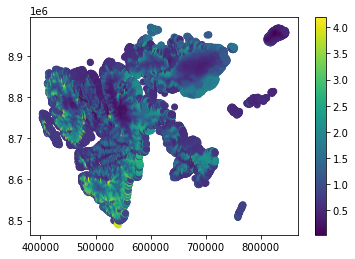

In [50]:
map_cmb = plt.scatter(df_runoff.X, df_runoff.Y, c=df_runoff.Runoff)
plt.colorbar(map_cmb)

In [55]:
x = df_runoff.X.values.flatten()
y = df_runoff.Y.values.flatten()
x.shape

(60570,)

In [56]:
XY = np.vstack((x,y)).T
XY.shape

(60570, 2)

In [52]:
x_center = df_center.x.values.flatten()
y_center = df_center.y.values.flatten()
x_center

array([ 552858.19783848,  552837.20966276,  552816.2214876 , ...,
       -329083.20303324, -329090.93954087, -329098.67604287])

In [53]:
runoff = df_runoff.Runoff.values.flatten()

In [58]:
df_center['Runoff'] = interp.griddata(XY, runoff, (x_center, y_center), method='linear')
df_center

,rgiid,x,y,Surge,BgnDate,EndDate,CenLon,CenLat,Area,Zmin,...,TermType,Linkages,Name,check_geom,geometry,bed,thickness,surface_elevation,width_centerline,Runoff
0,RGI60-07.00001,552858.197838,8.514877e+06,0,20080901,-9999999,17.03470,76.7052,0.597,142,...,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0,86.307950,1.939792
1,RGI60-07.00001,552837.209663,8.514876e+06,0,20080901,-9999999,17.03470,76.7052,0.597,142,...,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0,52.001931,1.940386
2,RGI60-07.00001,552816.221488,8.514875e+06,0,20080901,-9999999,17.03470,76.7052,0.597,142,...,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0,63.412109,1.940980
3,RGI60-07.00001,552795.233313,8.514875e+06,0,20080901,-9999999,17.03470,76.7052,0.597,142,...,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0,74.822291,1.941574
4,RGI60-07.00001,552774.245139,8.514874e+06,0,20080901,-9999999,17.03470,76.7052,0.597,142,...,0,9,NaN,NaN,NaN,401.832947,4.16705,406.0,112.223246,1.942168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134800,RGI60-07.01615,-329067.730001,8.041440e+06,9,19759999,-9999999,-8.34491,71.0142,0.098,351,...,0,9,NO4W00110527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134801,RGI60-07.01615,-329075.466520,8.041459e+06,9,19759999,-9999999,-8.34491,71.0142,0.098,351,...,0,9,NO4W00110527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134802,RGI60-07.01615,-329083.203033,8.041477e+06,9,19759999,-9999999,-8.34491,71.0142,0.098,351,...,0,9,NO4W00110527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134803,RGI60-07.01615,-329090.939541,8.041495e+06,9,19759999,-9999999,-8.34491,71.0142,0.098,351,...,0,9,NO4W00110527,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_ELA = pd.DataFrame(ELA[:, :, -1], index=Y[:, 0], columns=X[0]).unstack().reset_index()

df_ELA.columns = ['X' , 'Y', 'ELA']
df_ELA

,X,Y,ELA
0,382490,8450290,NaN
1,382490,8451290,NaN
2,382490,8452290,NaN
3,382490,8453290,NaN
4,382490,8454290,NaN
...,...,...,...
257395,849490,8995290,NaN
257396,849490,8996290,NaN
257397,849490,8997290,NaN
257398,849490,8998290,NaN


In [64]:
df_beta = pd.DataFrame(beta[:, :, -1], index=Y[:, 0], columns=X[0]).unstack().reset_index()

df_beta.columns = ['X' , 'Y', 'beta']
df_beta

,X,Y,beta
0,382490,8450290,NaN
1,382490,8451290,NaN
2,382490,8452290,NaN
3,382490,8453290,NaN
4,382490,8454290,NaN
...,...,...,...
257395,849490,8995290,NaN
257396,849490,8996290,NaN
257397,849490,8997290,NaN
257398,849490,8998290,NaN


In [65]:
df_cmb = pd.DataFrame(cmb[:, :, -1], index=Y[:, 0], columns=X[0]).unstack().reset_index()

df_cmb.columns = ['X' , 'Y', 'cmb']
df_cmb

,X,Y,cmb
0,382490,8450290,NaN
1,382490,8451290,NaN
2,382490,8452290,NaN
3,382490,8453290,NaN
4,382490,8454290,NaN
...,...,...,...
257395,849490,8995290,NaN
257396,849490,8996290,NaN
257397,849490,8997290,NaN
257398,849490,8998290,NaN


In [66]:
df_CMB = pd.merge(df_ELA, df_beta, on=['X', 'Y'])
df_CMB = pd.merge(df_CMB, df_cmb, on=['X', 'Y'])
df_CMB = df_CMB.dropna()
df_CMB

,X,Y,ELA,beta,cmb
14591,408490,8741290,603.058167,0.004152,-2.806572
15138,409490,8738290,603.058167,0.004403,-1.247225
15139,409490,8739290,603.058167,0.004388,-1.497246
15140,409490,8740290,603.058167,0.004498,-2.044743
15142,409490,8742290,603.058167,0.004488,-1.263965
...,...,...,...,...,...
254608,844490,8958290,6.401600,0.002050,0.255464
254609,844490,8959290,6.401600,0.002107,0.177512
254610,844490,8960290,6.401600,0.002150,0.076213
254611,844490,8961290,6.401600,0.002163,0.014600


In [67]:
x = df_CMB.X.values.flatten()
y = df_CMB.Y.values.flatten()

In [68]:
XY = np.vstack((x,y)).T
XY.shape

(37987, 2)

In [69]:
x_center = df_center.x.values.flatten()
y_center = df_center.y.values.flatten()
x_center

array([ 552858.19783848,  552837.20966276,  552816.2214876 , ...,
       -329083.20303324, -329090.93954087, -329098.67604287])

In [70]:
ELA = df_CMB.ELA.values.flatten()
beta = df_CMB.beta.values.flatten()
cmb = df_CMB.cmb.values.flatten()

In [73]:
df_center['ELA'] = interp.griddata(XY, ELA, (x_center, y_center), method='linear')
df_center['beta'] = interp.griddata(XY, beta, (x_center, y_center), method='linear')
df_center['cmb'] = interp.griddata(XY, cmb, (x_center, y_center), method='linear')

In [74]:
df_center.columns

Index(['rgiid', 'x', 'y', 'Surge', 'BgnDate', 'EndDate', 'CenLon', 'CenLat',
       'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'Status',
       'Connect', 'Form', 'TermType', 'Linkages', 'Name', 'check_geom',
       'geometry', 'bed', 'thickness', 'surface_elevation', 'width_centerline',
       'Runoff', 'ELA', 'beta', 'cmb'],
      dtype='object')

In [76]:
df_center.to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/df_center.csv')